In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore")

In [34]:
df=pd.read_csv("NORMAL_FEATURES .csv")

In [35]:
df.head()

Previous Stillbirth  Depression  Trauma  Previous Abortion  Drug intake  \
0                    0           0       0                  1            1   
1                    1           0       0                  1            0   
2                    1           0       1                  0            0   
3                    1           0       1                  1            0   
4                    1           0       0                  1            0   

   Patient Age (16-45)  Obesity  Diabetes  Thyroid  Hypertension  \
0                   23        0         1        1             1   
1                   26        1         0        1             0   
2                   21        0         1        1             0   
3                   22        1         1        0             1   
4                   37        0         0        1             1   

   Kidney Disease  Urine or Bladder Problem  Respiratory Problem  \
0               1                         0                    0   
1               0                         1                    0   
2               0                         1                    1   
3               0                         1                    1   
4               0                         1                    0   

   Cardio Problem  Genetic Disorder  Anemia  Water Break  Frequent Dizziness  \
0               1                 1       0            1                   1   
1               0                 1       0            1                   1   
2               1                 0       1            0                   0   
3               1                 1       1            1                   0   
4               1                 0       1            0                   1   

   Anyone in family having Diabetes/Thyroid or any genetic transferable disease  \
0                                                  1                              
1                                                  1                              
2                                                  0                              
3                                                  1                              
4                                                  0                              

   STILLBIRTH PREDICTION  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [36]:
df.rename(columns={"Patient Age (16-45)":"Patient Age"},inplace=True)


In [37]:
df.columns

Index(['Previous Stillbirth', 'Depression', 'Trauma', 'Previous Abortion',
       'Drug intake', 'Patient Age', 'Obesity', 'Diabetes', 'Thyroid',
       'Hypertension', 'Kidney Disease', 'Urine or Bladder Problem',
       'Respiratory Problem', 'Cardio Problem', 'Genetic Disorder', 'Anemia',
       'Water Break', 'Frequent Dizziness',
       'Anyone in family having Diabetes/Thyroid or any genetic transferable disease',
       'STILLBIRTH PREDICTION'],
      dtype='object')

In [38]:
df.shape

(100, 20)

In [39]:
df.describe()


Previous Stillbirth  Depression      Trauma  Previous Abortion  \
count           100.000000  100.000000  100.000000             100.00   
mean              0.530000    0.530000    0.500000               0.45   
std               0.501614    0.501614    0.502519               0.50   
min               0.000000    0.000000    0.000000               0.00   
25%               0.000000    0.000000    0.000000               0.00   
50%               1.000000    1.000000    0.500000               0.00   
75%               1.000000    1.000000    1.000000               1.00   
max               1.000000    1.000000    1.000000               1.00   

       Drug intake  Patient Age    Obesity    Diabetes     Thyroid  \
count   100.000000   100.000000  100.00000  100.000000  100.000000   
mean      0.470000    30.000000    0.43000    0.490000    0.530000   
std       0.501614     7.787584    0.49757    0.502418    0.501614   
min       0.000000    16.000000    0.00000    0.000000    0.000000   
25%       0.000000    23.750000    0.00000    0.000000    0.000000   
50%       0.000000    30.000000    0.00000    0.000000    1.000000   
75%       1.000000    35.250000    1.00000    1.000000    1.000000   
max       1.000000    45.000000    1.00000    1.000000    1.000000   

       Hypertension  Kidney Disease  Urine or Bladder Problem  \
count    100.000000      100.000000                    100.00   
mean       0.490000        0.460000                      0.55   
std        0.502418        0.500908                      0.50   
min        0.000000        0.000000                      0.00   
25%        0.000000        0.000000                      0.00   
50%        0.000000        0.000000                      1.00   
75%        1.000000        1.000000                      1.00   
max        1.000000        1.000000                      1.00   

       Respiratory Problem  Cardio Problem  Genetic Disorder      Anemia  \
count               100.00      100.000000        100.000000  100.000000   
mean                  0.45        0.490000          0.460000    0.440000   
std                   0.50        0.502418          0.500908    0.498888   
min                   0.00        0.000000          0.000000    0.000000   
25%                   0.00        0.000000          0.000000    0.000000   
50%                   0.00        0.000000          0.000000    0.000000   
75%                   1.00        1.000000          1.000000    1.000000   
max                   1.00        1.000000          1.000000    1.000000   

       Water Break  Frequent Dizziness  \
count   100.000000          100.000000   
mean      0.440000            0.500000   
std       0.498888            0.502519   
min       0.000000            0.000000   
25%       0.000000            0.000000   
50%       0.000000            0.500000   
75%       1.000000            1.000000   
max       1.000000            1.000000   

       Anyone in family having Diabetes/Thyroid or any genetic transferable disease  \
count                                         100.000000                              
mean                                            0.520000                              
std                                             0.502117                              
min                                             0.000000                              
25%                                             0.000000                              
50%                                             1.000000                              
75%                                             1.000000                              
max                                             1.000000                              

       STILLBIRTH PREDICTION  
count             100.000000  
mean                0.530000  
std                 0.501614  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 1.000000  
max                 1.000000

In [40]:
y=df['STILLBIRTH PREDICTION']
x=df.drop(['STILLBIRTH PREDICTION'],axis=1)


In [41]:
x.head()

Previous Stillbirth  Depression  Trauma  Previous Abortion  Drug intake  \
0                    0           0       0                  1            1   
1                    1           0       0                  1            0   
2                    1           0       1                  0            0   
3                    1           0       1                  1            0   
4                    1           0       0                  1            0   

   Patient Age  Obesity  Diabetes  Thyroid  Hypertension  Kidney Disease  \
0           23        0         1        1             1               1   
1           26        1         0        1             0               0   
2           21        0         1        1             0               0   
3           22        1         1        0             1               0   
4           37        0         0        1             1               0   

   Urine or Bladder Problem  Respiratory Problem  Cardio Problem  \
0                         0                    0               1   
1                         1                    0               0   
2                         1                    1               1   
3                         1                    1               1   
4                         1                    0               1   

   Genetic Disorder  Anemia  Water Break  Frequent Dizziness  \
0                 1       0            1                   1   
1                 1       0            1                   1   
2                 0       1            0                   0   
3                 1       1            1                   0   
4                 0       1            0                   1   

   Anyone in family having Diabetes/Thyroid or any genetic transferable disease  
0                                                  1                             
1                                                  1                             
2                                                  0                             
3                                                  1                             
4                                                  0

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

svc=SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train,y_train)

xbg_model = XGBClassifier()
xbg_model.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

model=LogisticRegression()
model.fit(X_train,y_train)

print('KNN:{:.2f}'.format(knn.score(X_test,y_test)*100))
print('RANDOM_FOREST:{:.2f}'.format(rf.score(X_test,y_test)*100))
print('LOG_REG:{:.2f}'.format(model.score(X_test,y_test)*100))
print('XGB:{:.2f}'.format(xbg_model.score(X_test,y_test)*100))
print('SVM:{:.2f}'.format(svc.score(X_test,y_test)*100))

from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn), ('rf', rf), ('log_reg', model),('XGB',xbg_model),('SVM',svc)]
ensemble = VotingClassifier(estimators,voting='hard')


ensemble.fit(X_train, y_train)
final_score=ensemble.score(X_test,y_test)

print(final_score*100, '%')

KNN:50.00
RANDOM_FOREST:75.00
LOG_REG:65.00
XGB:80.00
SVM:70.00
70.0 %


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy=[]
precision=[]
recall=[]
score=[]

In [45]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier()  
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))
classi_pred=classifier.predict(X_test)

classi_accu=accuracy_score(y_test,classi_pred)
classi_recall=recall_score(y_test,classi_pred)
classi_pre=precision_score(y_test,classi_pred)
classi_f1=f1_score(y_test,classi_pred, average='weighted')

accuracy.append(classi_accu*100)
precision.append(classi_pre)
recall.append(classi_recall)
score.append(classi_f1)

print(classi_accu)

0.5
0.5


In [46]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(rnd_clf.score(X_test,y_test))
rnd_pred=rnd_clf.predict(X_test)
res=rnd_clf.predict([[1,0,1,0,1.0,24, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]])
print(res)
rnd_accu=accuracy_score(y_test,rnd_pred)
rnd_recall=recall_score(y_test,rnd_pred)
rnd_pre=precision_score(y_test,rnd_pred)
rnd_f1=f1_score(y_test,rnd_pred,average='weighted')
accuracy.append(rnd_accu*100)
precision.append(rnd_pre)
recall.append(rnd_recall)
score.append(rnd_f1)
print(rnd_accu)
pickle.dump(rnd_clf,open('rf_model.pkl', 'wb'))
m = pickle.load(open('rf_model.pkl', 'rb')) 

0.75
[1]
0.75


In [47]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
model_pred=model.predict(X_test)

model_accu=accuracy_score(y_test,model_pred)
model_recall=recall_score(y_test,model_pred)
model_pre=precision_score(y_test,model_pred)
model_f1=f1_score(y_test,model_pred, average='weighted')

accuracy.append(model_accu*100)
precision.append(model_pre)
recall.append(model_recall)
score.append(model_f1)

print(model_accu)


0.65
0.65


In [48]:
from sklearn.svm import SVC
svc=SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

svc_accu=accuracy_score(y_test,svc_pred)
svc_recall=recall_score(y_test,svc_pred)
svc_pre=precision_score(y_test,svc_pred)
svc_f1=f1_score(y_test,svc_pred, average='weighted')

accuracy.append(svc_accu*100)
precision.append(svc_pre)
recall.append(svc_recall)
score.append(svc_f1)

print(svc_accu)

0.7


In [49]:
models = ['KNN', 'Random Forest', 'Logistic Regression', 'XGBoost', 'SVM']
model_test_scores = pd.DataFrame(list(zip(models,accuracy,precision,recall, score)), columns = ['Model', \
                                'Accuracy', 'Precision','Recall', 'F1-score'])
display(model_test_scores.head())

Model  Accuracy  Precision  Recall  F1-score
0                  KNN      50.0   0.500000     0.4  0.494949
1        Random Forest      75.0   0.727273     0.8  0.749373
2  Logistic Regression      65.0   0.636364     0.7  0.649123
3              XGBoost      70.0   0.750000     0.6  0.696970

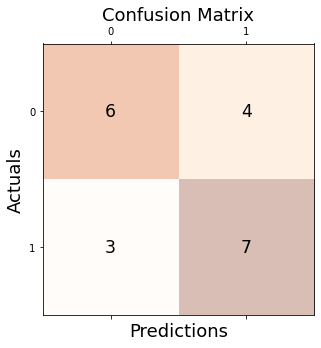

In [50]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=model_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
import shap
shap.initjs()

In [52]:
explainer = shap.Explainer(xbg_model, X_train)
shap_values = explainer(X_test)

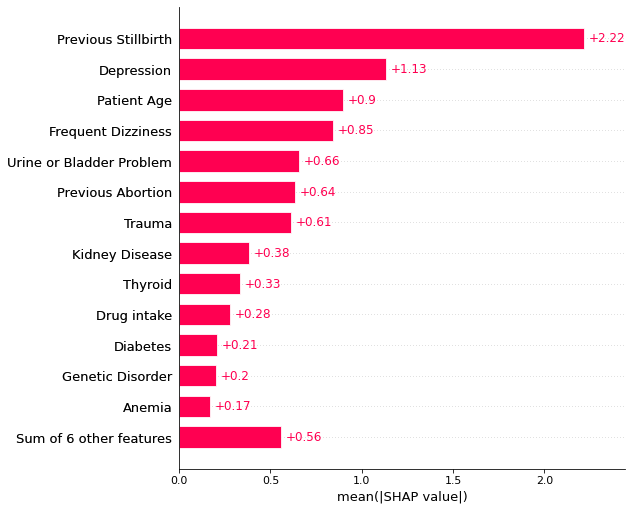

In [53]:
shap.plots.bar(shap_values, max_display=14)

In [54]:
df.columns

Index(['Previous Stillbirth', 'Depression', 'Trauma', 'Previous Abortion',
       'Drug intake', 'Patient Age', 'Obesity', 'Diabetes', 'Thyroid',
       'Hypertension', 'Kidney Disease', 'Urine or Bladder Problem',
       'Respiratory Problem', 'Cardio Problem', 'Genetic Disorder', 'Anemia',
       'Water Break', 'Frequent Dizziness',
       'Anyone in family having Diabetes/Thyroid or any genetic transferable disease',
       'STILLBIRTH PREDICTION'],
      dtype='object')

In [55]:
df.columns

Index(['Previous Stillbirth', 'Depression', 'Trauma', 'Previous Abortion',
       'Drug intake', 'Patient Age', 'Obesity', 'Diabetes', 'Thyroid',
       'Hypertension', 'Kidney Disease', 'Urine or Bladder Problem',
       'Respiratory Problem', 'Cardio Problem', 'Genetic Disorder', 'Anemia',
       'Water Break', 'Frequent Dizziness',
       'Anyone in family having Diabetes/Thyroid or any genetic transferable disease',
       'STILLBIRTH PREDICTION'],
      dtype='object')

In [56]:
X_test.shape

(20, 19)

In [57]:
X_test.shape

(20, 19)

In [58]:
p=X_test.tail(1).index.item()
# q=p-1
print(p)
prediction = xbg_model.predict(X_test[p:p+1])[0]
print("Model Prediction is: ",prediction)
# shap.plots.waterfall(shap_values[p], max_display=14)
# shap.plots.bar(shap_values[p], max_display=14)

8
Model Prediction is:  0


In [59]:
q=X_test.tail(1).index.item()
risk_pred = xbg_model.predict_proba(X_test[q:q+1])[0]
risk=risk_pred[1]*100
print(risk)
print("Risk of Stillbirth: ","{:.2f}".format(risk_pred[1]*100),"%")

3.719101846218109
Risk of Stillbirth:  3.72 %


In [60]:
 if risk>=0 and risk<=40:
    print("StillBirth risk is LOW")
elif risk>40 and risk<=70:
    print("StillBirth can occur")
else:
    print("StillBirth risk is HIGH, Please consult nearby Hospitals")    

StillBirth risk is LOW
